In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Plum.csv')

Mounted at /content/drive


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         2298 non-null   object 
 1   precio_venta    2277 non-null   float64
 2   peso            2298 non-null   float64
 3   t_id            2298 non-null   object 
 4   fecha_venta     2293 non-null   object 
 5   hora_venta      2293 non-null   object 
 6   tipo            2298 non-null   object 
 7   fecha_recogida  2298 non-null   object 
 8   hora_recogida   2298 non-null   object 
 9   lote            2298 non-null   object 
 10  marca           2298 non-null   object 
 11  coste_inicial   2234 non-null   float64
 12  proveedor       2298 non-null   object 
dtypes: float64(3), object(10)
memory usage: 233.5+ KB


In [3]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2277.000000  2298.000000    2234.000000
mean       3.483518   299.365603       2.010951
std        0.721962   102.761512       0.503999
min        1.329116   -12.426420       0.040862
25%        2.975898   228.583534       1.657757
50%        3.476247   299.957217       2.002375
75%        3.963843   367.763204       2.333708
max        6.061236   610.773035       3.770693


In [4]:
print(df.head())

         cliente  precio_venta        peso             t_id fecha_venta  \
0  CompraMaestra      4.191254  208.942509  PlumÒÇé1087.png  2022/09/24   
1  CompraMaestra      2.620328  200.502544  PlumÒÇé1092.png  2022/09/02   
2  CompraMaestra      4.024618   81.318597  PlumÒÇé1100.png  2022/09/03   
3  CompraMaestra      3.014705  109.202474  PlumÒÇé1127.png  2022/09/05   
4  CompraMaestra      3.449042  222.438465  PlumÒÇé1163.png  2022/09/14   

  hora_venta  tipo fecha_recogida hora_recogida                     lote  \
0      04:00  Plum     2022/09/23         23:00  V76E77T199K49L56S46V78M   
1      02:00  Plum     2022/09/01         19:00  V76E77T199K49L57N46V78M   
2      18:00  Plum     2022/09/03         13:00  V76E77T199K49M48L46V78M   
3      05:00  Plum     2022/09/04         23:00  V76E77T199K49M50S46V78M   
4      18:00  Plum     2022/09/14         05:00  V76E77T199K49M54O46V78M   

                 marca  coste_inicial                        proveedor  
0      MaravillaJug

In [5]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor
0,CompraMaestra,4.19,208.94,PlumÒÇé1087.png,2022/09/24,04:00,Plum,2022/09/23,23:00,V76E77T199K49L56S46V78M,MaravillaJugosa,2.65,Mallas AgroProtección García
1,CompraMaestra,2.62,200.50,PlumÒÇé1092.png,2022/09/02,02:00,Plum,2022/09/01,19:00,V76E77T199K49L57N46V78M,FrescuraInigualable,1.53,Tecnosembradoras del Sur
2,CompraMaestra,4.02,81.32,PlumÒÇé1100.png,2022/09/03,18:00,Plum,2022/09/03,13:00,V76E77T199K49M48L46V78M,PlacerFrutado,2.15,AgroSuministros del Campo
3,CompraMaestra,3.01,109.20,PlumÒÇé1127.png,2022/09/05,05:00,Plum,2022/09/04,23:00,V76E77T199K49M50S46V78M,PlacerFrutado,1.96,Ganadería Orgánica TierraFértil
4,CompraMaestra,3.45,222.44,PlumÒÇé1163.png,2022/09/14,18:00,Plum,2022/09/14,05:00,V76E77T199K49M54O46V78M,ArteFrutal,1.80,Avícola San José


In [36]:
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]

if not columns_with_nulls.empty:
    print("Columns with null values and their counts:")
    print(columns_with_nulls)
else:
    print("No null values found in any column of the DataFrame.")

Columns with null values and their counts:
precio_venta     21
peso              2
fecha_venta       5
hora_venta        5
coste_inicial    64
dtype: int64


# **PESO**

Empezamos analizando los PESOS

In [6]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -12.43
Peso máximo: 610.77
Total negativos: 2
Total nulos: 0


In [7]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
CítricosSelectos,1
FiestaSabor,1


In [8]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Fitosanitarios BioPro,1
RiegoSmart Innovación,1


In [9]:
df[df["peso"] < 0]["lote"].unique()

array(['V76E77T199K57Q52J80T71', 'V76E77T199K54P46V78M'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes V76E77T199K.

In [10]:
print(negativos["peso"])

1217   -12.43
1428    -7.63
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [11]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                 cliente  precio_venta   peso            t_id fecha_venta  \
1217  SuperMercado Ideal          3.93 -12.43  PlumÒÇé954.png  2022/09/26   
1428  Mercado Fresco XYZ          3.55  -7.63   PlumÒÇé64.png  2022/09/19   

     hora_venta  tipo fecha_recogida hora_recogida                    lote  \
1217      17:00  Plum     2022/09/26         11:00  V76E77T199K57Q52J80T71   
1428      08:00  Plum     2022/09/19         08:00    V76E77T199K54P46V78M   

                 marca  coste_inicial              proveedor  
1217  CítricosSelectos           2.60  Fitosanitarios BioPro  
1428       FiestaSabor           1.94  RiegoSmart Innovación  


Reemplazamos todos los valores negativos por NaN


In [12]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [13]:
print("Cantidad de pesos mayores de 300 g:", len(df[df['peso'] > 300]))
print("Peso máximo:", df.loc[df['peso'] > 300, 'peso'].max())

Cantidad de pesos mayores de 300 g: 1149
Peso máximo: 610.77


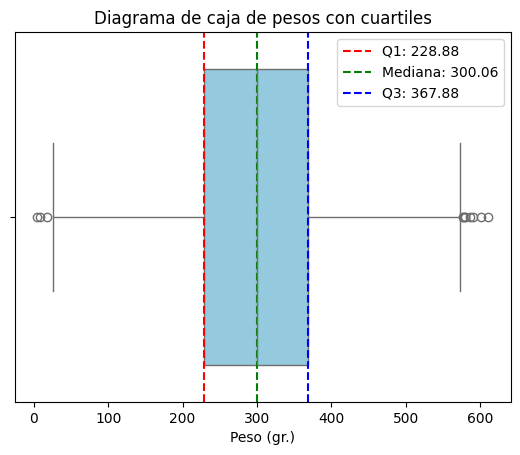

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

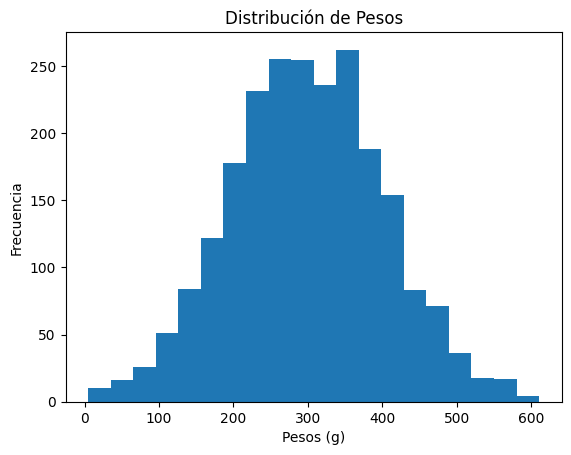

In [15]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [16]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 8
228.8825
367.88
138.9975


In [17]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

        peso             t_id
1536    4.96  PlumÒÇé1586.png
38      8.74   PlumÒÇé189.png
1576   17.41  PlumÒÇé1071.png
2245   26.08  PlumÒÇé1515.png
396    27.55   PlumÒÇé971.png
...      ...              ...
975   579.37  PlumÒÇé1761.png
1055  586.34   PlumÒÇé215.png
1157  589.74  PlumÒÇé1569.png
744   601.35  PlumÒÇé1166.png
446   610.77   PlumÒÇé500.png

[2296 rows x 2 columns]


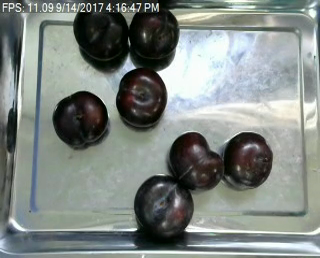

In [18]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Plum/PlumÒÇé189.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En la imagen anteior se visualizan 7 ciruelas con un peso de tan solo 8.737076 gr.

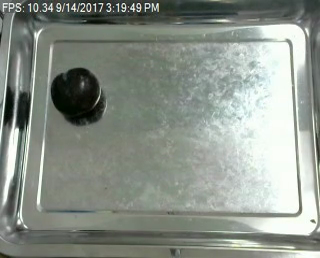

In [19]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Plum/PlumÒÇé1761.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

Mientras que en esta imagen con 579.370732 gr. tiene tan solo una ciruela.
Teniendo en cuenta que una unidad de ciruela tiene un peso aproximado entre 40 y 70 gramos podriamos afirmar que no encajan ninguna de las imagenes mostradas.
Las imagenes: PlumÒÇé1586.png, PlumÒÇé189.png, PlumÒÇé1071.png, PlumÒÇé1515.png y PlumÒÇé971.png son imagenes con un peso menor a 30 gramos por lo que podriamos afirmar que podemos encontrar bastantes pesos erroneos.

Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.


# **COSTE INICIAL**

In [20]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.04
Coste inicial máximo: 3.77
Coste inicial negativos: 0
Coste inicial nulos: 64


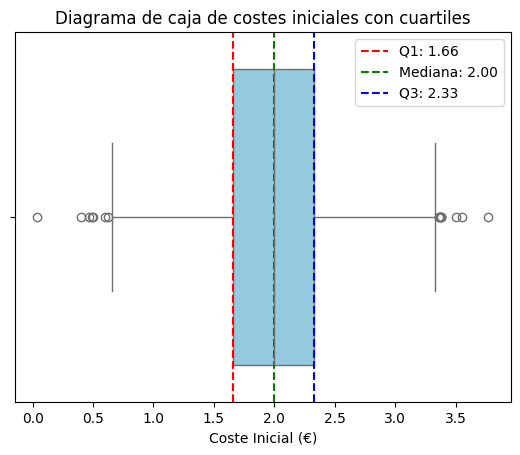

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

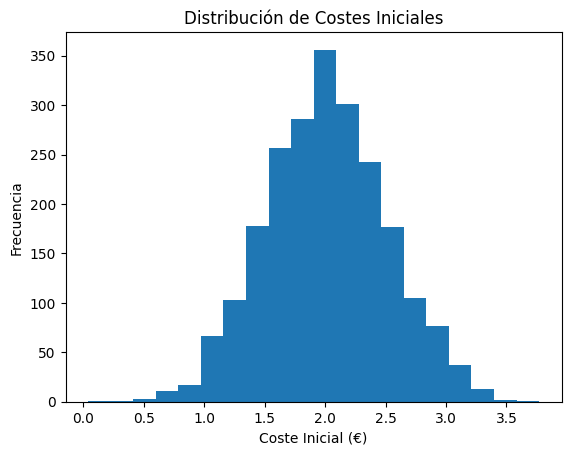

In [22]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [23]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 9
1.66
2.33
0.6700000000000002


Una vez analizados los costes iniciales y viendo que tenemos 9 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [24]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 1.33
Precio venta máximo: 6.06
Total negativos: 0
Total nulos: 21


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [25]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno de los 21 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. El resto ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

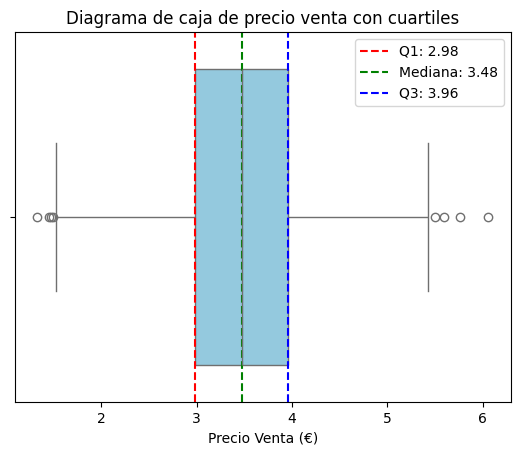

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

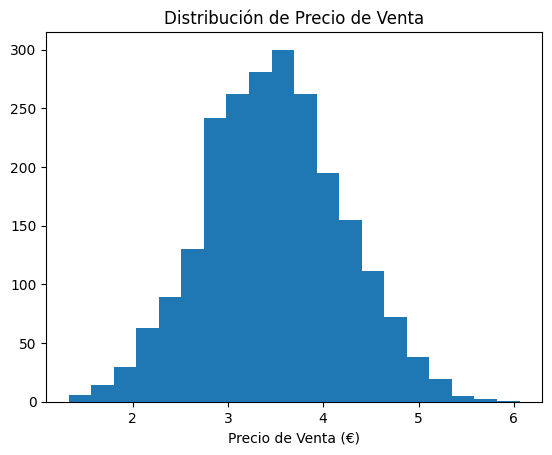

In [27]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [28]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)


Total outliers: 4
2.98
3.96


En precio venta tenemos 4 outliers mientras que en coste inicial teníamos 9.

In [29]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,Mercado del Barrio,5.60,289.49,PlumÒÇé999.png,2022/09/18,00:00,Plum,2022/09/17,22:00,V76E77T199K57U57J80T71,...,289.49,2022/09/18,00:00,Plum,2022/09/17,22:00,V76E77T199K57U57J80T71,DulceEncanto,3.36,Ganadería Orgánica TierraFértil
1,El Bazar de la Comida,5.76,277.23,PlumÒÇé1973.png,2022/09/10,15:00,Plum,2022/09/10,13:00,V76E77T199K49U55O46V78M,...,277.23,2022/09/10,15:00,Plum,2022/09/10,13:00,V76E77T199K49U55O46V78M,CosechaDivina,3.77,Fitosanitarios BioPro


2 coinciden.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [30]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [31]:
tiempo_diferencia.min()

Timedelta('-30 days +00:00:00')

In [32]:
tiempo_diferencia.sort_values()

,0
651,-30 days
665,-30 days
269,-27 days
1289,-25 days
2176,-24 days
...,...
211,NaT
628,NaT
1387,NaT
1513,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [33]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de ciruelas a un proveedor en un solo día.

**En el caso de las ciruelas esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [34]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con las ciruelas no encontramos más de un tipo de fruta pero sí más de una marca.
**Con las ciruelas esta norma  se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.703548,-0.32881
precio_venta,0.703548,1.000000,-0.00854
rentabilidad,-0.328810,-0.008540,1.00000


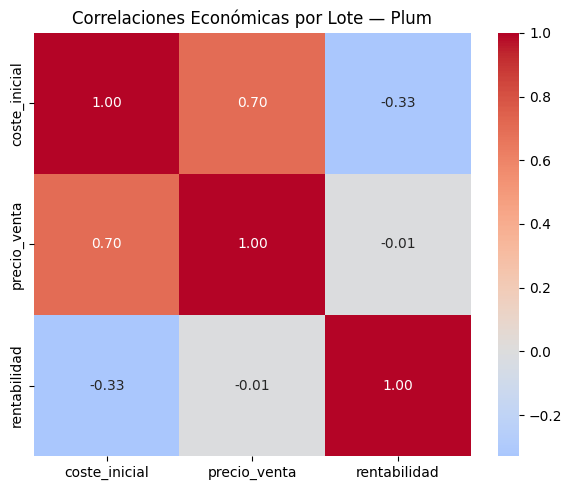

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Plum')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.703548 -0.002690
coste_inicial      0.703548       1.000000 -0.004321
peso              -0.002690      -0.004321  1.000000


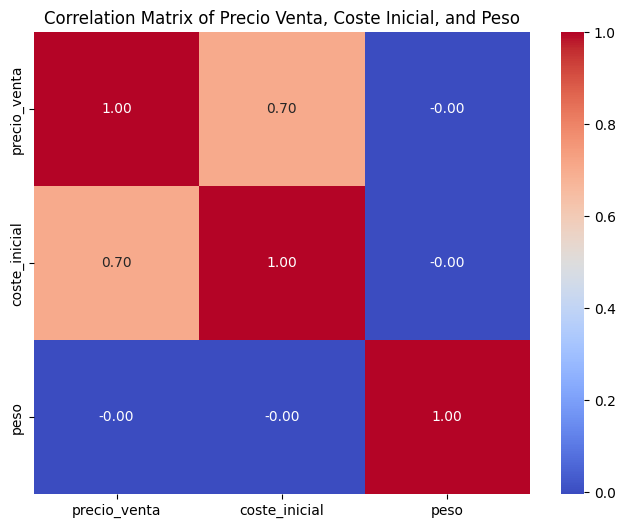

In [ ]:
correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.70 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de las ciruelas y pasamos a analizar la siguiente fruta.